In [2]:
# Install required packages
!pip install kaggle kagglehub pyyaml -q

In [4]:
import sys
import os

# Add parent directory to path
sys.path.append(os.path.abspath('..'))

# Set Credentials (if needed)
if "KAGGLE_USERNAME" not in os.environ:
    os.environ["KAGGLE_USERNAME"] = "YOUR_USERNAME"
    os.environ["KAGGLE_KEY"] = "YOUR_KEY"

# Import and Run
from src.data_loader import load_sku110k_data

# This downloads data to '../data' and saves '../sku110k_fixed.yaml'
config_path = load_sku110k_data(target_yaml_path="../sku110k_fixed.yaml")

if config_path and os.path.exists(config_path):
    print("Setup Complete. You can now run the training notebooks.")
else:
    print("Setup Failed.")

Searching for 'SKU110K_fixed' in /workspace/dl4cv-final-project/data...
Found existing data at: /workspace/dl4cv-final-project/data/datasets/thedatasith/sku110k-annotations/versions/14/SKU110K_fixed
Config saved to: /workspace/dl4cv-final-project/sku110k_fixed.yaml
Setup Complete. You can now run the training notebooks.


In [3]:
import yaml
import random
import matplotlib.pyplot as plt
from PIL import Image
import os

# Load the YAML file to get the paths
yaml_path = "../sku110k_fixed.yaml"

with open(yaml_path, 'r') as f:
    config = yaml.safe_load(f)

# Extract paths (relative to the YAML file location)
# The YAML usually contains: path, train, val, test
base_path = config.get('path', '')

splits = {
    'train': os.path.join(base_path, config['train']),
    'val': os.path.join(base_path, config['val']),
    'test': os.path.join(base_path, config.get('test', config['val'])) # Fallback to val if test is missing
}

In [4]:
# Display Function
def show_random_images(split_name, folder_path, num_images=2):
    print(f"\n--- {split_name.upper()} SET ({folder_path}) ---")
    
    if not os.path.exists(folder_path):
        print(f"Path not found: {folder_path}")
        return

    # Get all valid images
    all_images = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    
    if not all_images:
        print("No images found.")
        return

    # Pick random samples
    selected = random.sample(all_images, min(len(all_images), num_images))
    
    # Plot
    fig, axes = plt.subplots(1, len(selected), figsize=(12, 6))
    if len(selected) == 1: axes = [axes] # Handle single image case
    
    for ax, img_name in zip(axes, selected):
        img_path = os.path.join(folder_path, img_name)
        img = Image.open(img_path)
        
        ax.imshow(img)
        ax.set_title(img_name)
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()


--- TRAIN SET (/workspace/dl4cv-final-project/data/datasets/thedatasith/sku110k-annotations/versions/14/SKU110K_fixed/images/train) ---


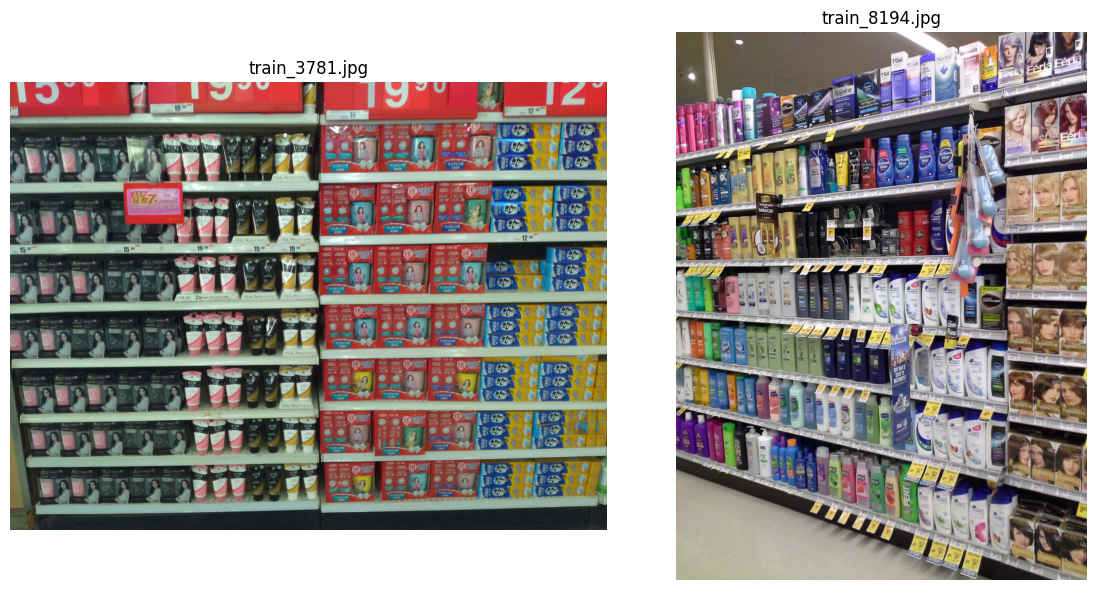


--- VAL SET (/workspace/dl4cv-final-project/data/datasets/thedatasith/sku110k-annotations/versions/14/SKU110K_fixed/images/val) ---


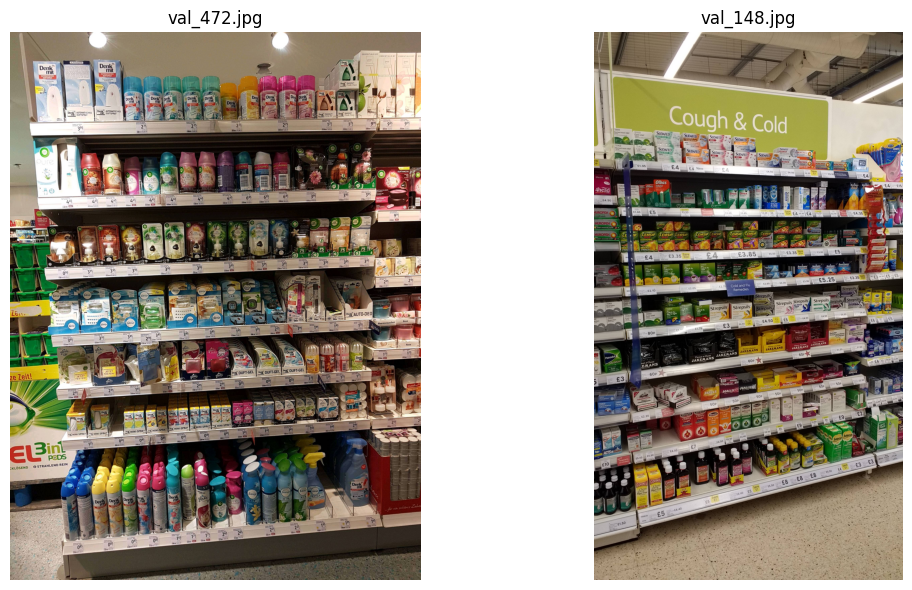


--- TEST SET (/workspace/dl4cv-final-project/data/datasets/thedatasith/sku110k-annotations/versions/14/SKU110K_fixed/images/test) ---


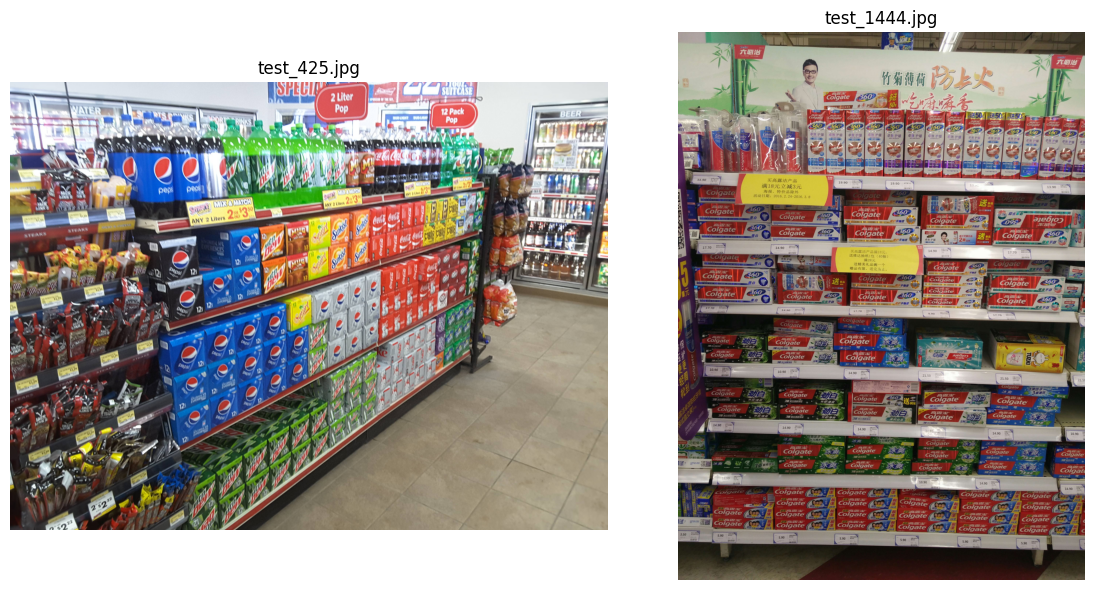

In [5]:
# Run for each split
for split, path in splits.items():    
    if not path.endswith("images") and not os.path.exists(path):
         check_path = os.path.join(path, "images")
         if os.path.exists(check_path):
             path = check_path
             
    show_random_images(split, path)